In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
url_data = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/default_islp.csv"
default = pd.read_csv(url_data)
default.head()

,Unnamed: 0,default,student,balance,income
0,0,No,No,729.526495,44361.625074
1,1,No,Yes,817.180407,12106.134700
2,2,No,No,1073.549164,31767.138947
3,3,No,No,529.250605,35704.493935
4,4,No,No,785.655883,38463.495879


In [2]:
default.value_counts()

Unnamed: 0  default  student  balance      income      
0           No       No       729.526495   44361.625074    1
1           No       Yes      817.180407   12106.134700    1
2           No       No       1073.549164  31767.138947    1
3           No       No       529.250605   35704.493935    1
4           No       No       785.655883   38463.495879    1
                                                          ..
9995        No       No       711.555020   52992.378914    1
9996        No       No       757.962918   19660.721768    1
9997        No       No       845.411989   58636.156984    1
9998        No       No       1569.009053  36669.112365    1
9999        No       Yes      200.922183   16862.952321    1
Name: count, Length: 10000, dtype: int64

In [3]:
default["default"] = [0 if xx == "No" else 1 for xx in default["default"]]
default["default"].value_counts()

default
0    9667
1     333
Name: count, dtype: int64

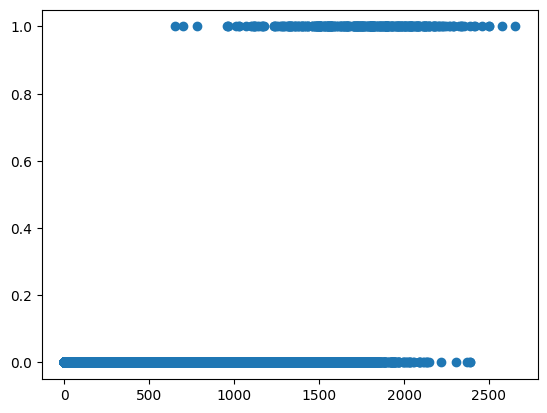

In [4]:
plt.scatter(default["balance"], default["default"])

In [12]:
X = default[["balance"]]
y = default["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=177013)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_Pr = model.predict_proba(X_test)[:,1]
y_pred_Pr

array([1.39551480e-03, 3.21795303e-05, 1.00226198e-04, ...,
       6.87114238e-04, 2.58141640e-05, 4.61593424e-03], shape=(2000,))

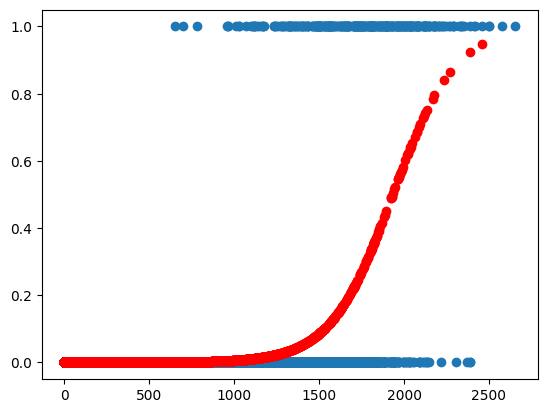

In [15]:
plt.scatter(default["balance"], default["default"])
plt.scatter(X_test, y_pred_Pr, color="red")

In [16]:
accu = accuracy_score(y_test, y_pred)
print(f"Precisión: {accu:.4f}")

Precisión: 0.9750


Text(50.72222222222221, 0.5, 'Real')

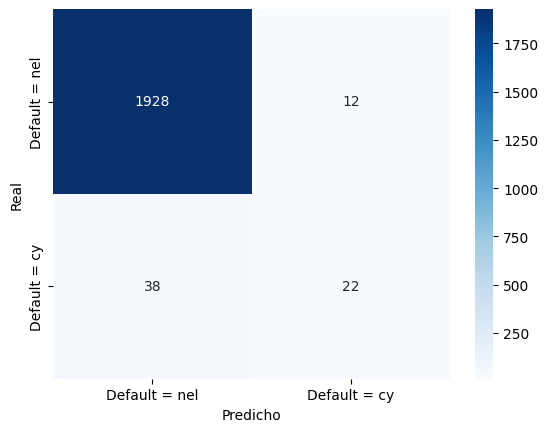

In [21]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=["Default = nel", "Default = cy"], yticklabels=["Default = nel", "Default = cy"])
plt.xlabel("Predicho")
plt.ylabel("Real")

In [26]:
# Negativos de verdad, falsos positivos, falsos negativos, positivos de verdad
TN, FP, FN, TP = conf_matrix.ravel()
sensibilidad = TP / (TP+FN)
especificidad = TN / (TN+FP)
print(f"Sensibilidad: {sensibilidad:.4f}, especificidad: {especificidad:.4f}")

Sensibilidad: 0.3667, especificidad: 0.9938


In [31]:
# SMOTE: Synthetic minority oversampling technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=177013)
X_train_smote = y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)
accu_smote = accuracy_score(y_test, y_pred_smote)
print(f"Precisión sin SMOTE: {accu}, con SMOTE: {accu_smote}")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 15454) + inhomogeneous part.

In [ ]:
import seaborn as sns
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=["Default = nel", "Default = cy"], yticklabels=["Default = nel", "Default = cy"])
plt.xlabel("Predicho")
plt.ylabel("Real")